In [90]:
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt
import glob

In [91]:
def cross_section(data, state, normalize=False, a_sp=None):
    state_mask = data['state']==state
    und_mask = (data['state']==-1) | (data['state']==-3) #Failed or Timeout

    b_max = np.max(data['b'][state_mask]) | units.AU

    cs = np.pi * b_max**2 * np.sum(state_mask) / len(state_mask)
    stat_error = 1/np.sqrt(np.sum(state_mask)) * cs
    system_error = np.pi * b_max**2 * np.sum(und_mask) / len(state_mask)

    if normalize and a_sp is not None:
        cs /= np.pi * a_sp**2
        stat_error /= np.pi * a_sp**2
        system_error /= np.pi * a_sp**2
    if normalize and a_sp is None:
        raise ValueError("a_sp must be provided for normalization")

    return cs, stat_error, system_error

In [92]:
state_dict = {0: ('Other', 'Other'),
              1: ('FFPM', 'Free Floating Planet Moon Pair'),
              2: ('FFPWM', 'Free Floating Planet Without Moon'),
              3: ('FFMBP', 'Free Floating Moon, Bound Planet')}

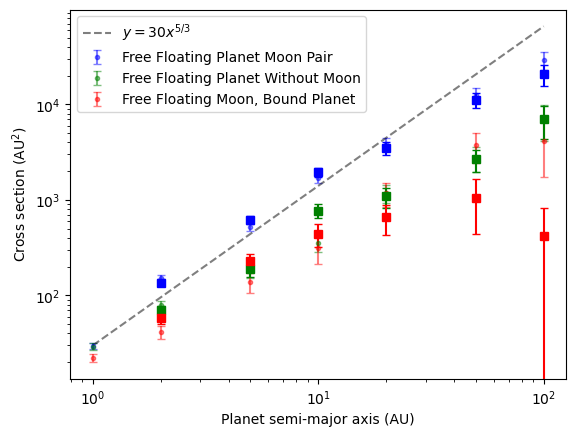

In [93]:
semi_majors = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
semi_majors_fast = [2.0, 5.0, 10.0, 20.0, 50.0, 100.0]

clrs = ['blue', 'green', 'red']

path_old = '/home/ybadoux/Documents/MRP/ALICE_spm/old/'
path_fast = '/home/ybadoux/Documents/MRP/ALICE_spm/fast/'

def power_law(x, a, b):
    return a * x**b

# for semi_major in semi_majors:
#     data = np.load(path_old+f'results_semi-major_{semi_major} au.npy')
#     for i in range(1,4):
#         cs, stat_error, system_error = cross_section(data, i)
#         print(f"Cross section for {state_dict[i][0]} at {semi_major} AU: {cs.value_in(units.AU**2)} ± {stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2)} AU^2")

# Plotting the results
fig, ax = plt.subplots()
for j,semi_major in enumerate(semi_majors):
    data = np.load(path_old+f'results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i)
        if j == 1:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2),
                         fmt='.', label=state_dict[i][1], color=clrs[i-1], capsize=3, alpha=0.5)
        else:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2),
                         fmt='.', color=clrs[i-1], capsize=3, alpha=0.5)

for j,semi_major in enumerate(semi_majors_fast):
    data = np.load(path_fast+f'results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i)
        if j == 1:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2),
                         fmt='s', color=clrs[i-1], capsize=3)
        else:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2),
                         fmt='s', color=clrs[i-1], capsize=3)

ax.plot(np.array(semi_majors), power_law(np.array(semi_majors), 30, 1.67), 'k--', label=r'$y=30x^{5/3}$', alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Planet semi-major axis (AU)')
ax.set_ylabel(r'Cross section (AU$^2$)')
# ax.set_title('Cross section vs PlanetSemi-major axis')
ax.legend()
plt.savefig('cross_section_vs_semi_major.png')
plt.show()

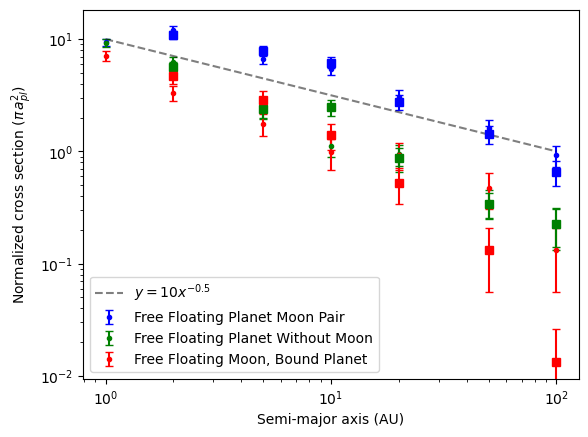

In [94]:
#plot normalized
fig, ax = plt.subplots()
for j,semi_major in enumerate(semi_majors):
    data = np.load(path_old+f'results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i, normalize=True, a_sp=semi_major|units.AU)
        if j == 1:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='.', label=state_dict[i][1], color=clrs[i-1], capsize=3)
        else:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='.', color=clrs[i-1], capsize=3)

for j,semi_major in enumerate(semi_majors_fast):
    data = np.load(path_fast+f'results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i, normalize=True, a_sp=semi_major|units.AU)
        if j == 1:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='s', color=clrs[i-1], capsize=3)
        else:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='s', color=clrs[i-1], capsize=3)

ax.plot(np.array(semi_majors), power_law(np.array(semi_majors), 10, -0.5), 'k--', label=r'$y=10x^{-0.5}$', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Normalized cross section ($\pi\, a_{pl}^2$)')
# ax.set_title('Normalized cross section vs Planet semi-major axis')
ax.legend()
plt.savefig('normalized_cross_section_vs_semi_major.png')
plt.show()

Moon survival fraction for semi-major axis 1.0 AU: 0.56 ± 0.03
Moon survival fraction for semi-major axis 2.0 AU: 0.62 ± 0.03
Moon survival fraction for semi-major axis 5.0 AU: 0.70 ± 0.04
Moon survival fraction for semi-major axis 10.0 AU: 0.75 ± 0.04
Moon survival fraction for semi-major axis 20.0 AU: 0.68 ± 0.06
Moon survival fraction for semi-major axis 50.0 AU: 0.73 ± 0.07
Moon survival fraction for semi-major axis 100.0 AU: 0.78 ± 0.08
Moon survival fraction for semi-major axis 2.0 AU: 0.61 ± 0.03
Moon survival fraction for semi-major axis 5.0 AU: 0.74 ± 0.04
Moon survival fraction for semi-major axis 10.0 AU: 0.69 ± 0.04
Moon survival fraction for semi-major axis 20.0 AU: 0.69 ± 0.06
Moon survival fraction for semi-major axis 50.0 AU: 0.68 ± 0.07
Moon survival fraction for semi-major axis 100.0 AU: 0.70 ± 0.10


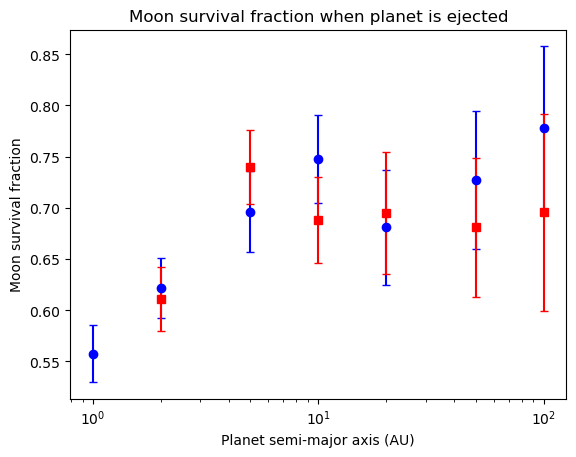

In [97]:
for a in semi_majors:
    data = np.load(path_old+f'results_semi-major_{a} au.npy')
    
    #count planet ejections
    pl_eject_mask = (data['state']==1) | (data['state']==2)
    pm_pair_mask = (data['state']==1)

    moon_survival_frac = np.sum(pm_pair_mask) / np.sum(pl_eject_mask)
    moon_survival_frac_error = np.sqrt(moon_survival_frac * (1 - moon_survival_frac) / np.sum(pl_eject_mask))
    print(f"Moon survival fraction for semi-major axis {a} AU: {moon_survival_frac:.2f} ± {moon_survival_frac_error:.2f}")

    plt.errorbar(a, moon_survival_frac, yerr=moon_survival_frac_error, fmt='o', color='blue', label='Moon survival fraction', capsize=3)


for a in semi_majors_fast:
    data = np.load(path_fast+f'results_semi-major_{a} au.npy')
    
    #count planet ejections
    pl_eject_mask = (data['state']==1) | (data['state']==2)
    pm_pair_mask = (data['state']==1)

    moon_survival_frac = np.sum(pm_pair_mask) / np.sum(pl_eject_mask)
    moon_survival_frac_error = np.sqrt(moon_survival_frac * (1 - moon_survival_frac) / np.sum(pl_eject_mask))
    print(f"Moon survival fraction for semi-major axis {a} AU: {moon_survival_frac:.2f} ± {moon_survival_frac_error:.2f}")
    
    plt.errorbar(a, moon_survival_frac, yerr=moon_survival_frac_error, fmt='s', color='red', label='Moon survival fraction', capsize=3)

plt.xscale('log')
plt.xlabel('Planet semi-major axis (AU)')
plt.ylabel('Moon survival fraction')
plt.title('Moon survival fraction when planet is ejected')
# plt.legend()
# plt.savefig('moon_survival_fraction.png')
plt.show()

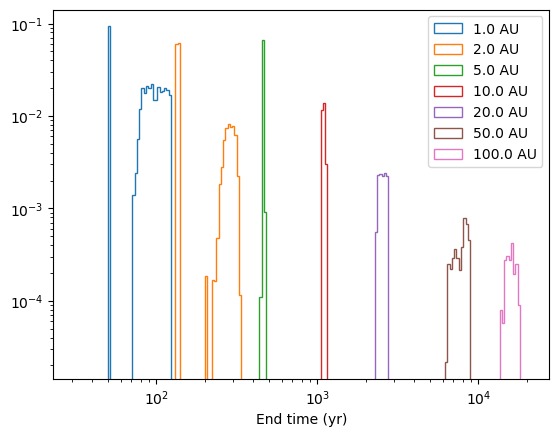

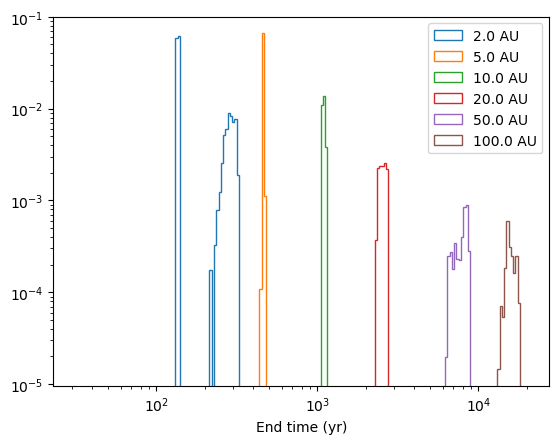

In [96]:
plt.figure()
for a in semi_majors:
    data = np.load(path_old+f'results_semi-major_{a} au.npy')
    
    plt.hist(data['end_time'], bins=np.logspace(1.5,4.3,200), density=True, histtype='step', label=f'{a} AU')

plt.xlabel('End time (yr)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
for a in semi_majors_fast:
    data = np.load(path_fast+f'results_semi-major_{a} au.npy')
    
    plt.hist(data['end_time'], bins=np.logspace(1.5,4.3,200), density=True, histtype='step', label=f'{a} AU')
plt.xlabel('End time (yr)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()